In [299]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [300]:
df = pd.read_csv('glass.csv')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [301]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [302]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Type', axis=1), df['Type'], test_size=0.20, random_state=42)

In [303]:
global accuracies
global classification_reports
global confusion_matrices

accuracies = []
classification_reports = []
confusion_matrices = []


for i in range(1,50):
    model = KNeighborsClassifier(i)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, predictions))
    classification_reports.append(classification_report(y_test, predictions))
    confusion_matrices.append(confusion_matrix(y_test, predictions))

In [304]:
def get_metrics(n):
    print("Accuracy: " + str(accuracies[n-1]) + "\n")
    print("Classification Report: \n" + classification_reports[n-1] + "\n")
    print("Confusion Matrix: \n" + str(confusion_matrices[n-1]) + "\n")

<module 'matplotlib.pyplot' from '/Users/enesertas/Library/Python/3.8/lib/python/site-packages/matplotlib/pyplot.py'>

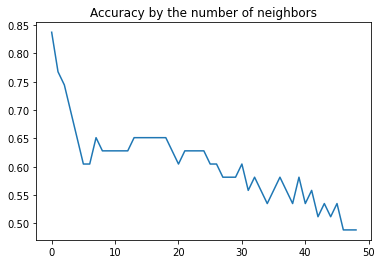

In [305]:
plt.title('Accuracy by the number of neighbors')
plt.plot(accuracies)
plt


In [306]:
from IPython.display import clear_output
inp = ""
while(inp != "exit"):
    clear_output(wait=True)
    inp = input("What number of neighbor metrics you want to know?\nType exit to exit else enter an integer.\n")
    if(inp != "exit"):
        print("Showing results for n = " + str(inp) + "\n")
        get_metrics(int(inp))

Showing results for n = 1

Accuracy: 0.8372093023255814

Classification Report: 
              precision    recall  f1-score   support

           1       0.75      0.82      0.78        11
           2       0.92      0.86      0.89        14
           3       0.67      0.67      0.67         3
           5       0.80      1.00      0.89         4
           6       0.67      0.67      0.67         3
           7       1.00      0.88      0.93         8

    accuracy                           0.84        43
   macro avg       0.80      0.81      0.80        43
weighted avg       0.85      0.84      0.84        43


Confusion Matrix: 
[[ 9  1  1  0  0  0]
 [ 2 12  0  0  0  0]
 [ 1  0  2  0  0  0]
 [ 0  0  0  4  0  0]
 [ 0  0  0  1  2  0]
 [ 0  0  0  0  1  7]]

